<a href="https://colab.research.google.com/github/SanghunOh/with_webscraping/blob/main/codes/APIs/youtube_channel_viewcounts_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Youtube API key 생성
https://console.cloud.google.com/apis/dashboard

##make class with google api

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import operator


class Factory_chellenge_youtube_api:
    def __init__(self, _api_key):
        self.google_api_key = _api_key
        self.youtube_api_service_name = "youtube"
        self.youtube_api_version = 'v3'

    def videoID_likes(self, _channelId, _maxResults=6):
        youtube = build(self.youtube_api_service_name, self.youtube_api_version, developerKey=self.google_api_key)

        search_response = youtube.search().list(
            channelId=_channelId,
            order='viewCount',
            part='snippet',
            maxResults=_maxResults
        ).execute()
        # print(search_response)
        # 검색을 위한 videoID 추출
        videoIds = []
        for i in range(0, len(search_response['items'])):
            videoIds.append((search_response['items'][i]['id']['videoId']))

        video_title_lst = []  # Video 이름을 담는 리스트
        channel_rating_good = []  # 채널 좋아요 수를 담는 리스트
        dicts = {}  # 채널 이름 + 좋아요 수

        # 영상이름, 조회수 , 좋아요 등 정보 등 추출
        for k in range(0, len(search_response['items'])):
            videoIdslists = youtube.videos().list(
                part='snippet, statistics',
                id=videoIds[k],
            ).execute()

            # Video Name
            video_title_lst.append(videoIdslists['items'][0]['snippet'].get('title'))

            # 좋아요 입력
            channel_rating_good.append(videoIdslists['items'][0]['statistics'].get('likeCount'))

        for title_plus_rating in zip(video_title_lst, channel_rating_good):
            dicts[title_plus_rating[0]] = int(title_plus_rating[1])
        sdicts = sorted(dicts.items(), key=operator.itemgetter(1), reverse=True)

        return sdicts


In [ ]:
Factory_chellenge = Factory_chellenge_youtube_api('<google api key>')  # 최초 class 선언
channelID_likes_sum = Factory_chellenge.videoID_likes('UCekRAdqYAcVNn_0DmJc0Rdg', 10)  # 좋아요 + 조회수 추출

In [ ]:
channelID_likes_sum

[('PLAYLIST | 답답할 때 듣자마자 신나게 C코드 잡게 만들었던 🎤팝-펑크 라떼', 74),
 ('PLAYLIST | 도입부부터 분위기 미쳐버린 플레이리스트 광고없는 분위기 깡패 노래모음', 29),
 ('PLAYLIST | 2021년 수고했어. 2022년은 즐겁고 행복한 일들만 있을거야! 2021년 마무리하며 듣기 좋은 플레이리스트 광고없는 음악 모음',
  14),
 ('PLAYLIST | 가을바람 불어오는 갈대숲에서 가을분위기 딥(DEEP)하게 취하기🍁', 10),
 ('PLAYLIST | 청소기 잠깐 돌리려다 대청소하게 되는 신나는 플레이리스트 광고없는 청소 노동요', 8),
 ('PLAYLIST | 프로젝트 시작 전 자존감 급속충전', 7),
 ('PLAYLIST | 여름휴가 놓친 나를 위한 사무실 휴가지 만드는 플리🎵', 6),
 ('PLAYLIST | 영화 다시 찾아보게 만드는 카라멜팝콘 같은 사운드트랙(영화 OST & 삽입곡)', 6),
 ('PLAYLIST | 봄 드라이브 갈 때 조수석 준비물은 이걸로 끝. 광고없는 봄 감성 노래모음', 5),
 ('PLAYLIST | 지친 하루를 보내고 마음이 복잡할 때 날 위로하는 플레이리스트', 4)]

In [ ]:
df = pd.DataFrame(channelID_likes_sum)
df.columns = ['Video_title', 'Video_likes']
df

,Video_title,Video_likes
0,PLAYLIST | 답답할 때 듣자마자 신나게 C코드 잡게 만들었던 🎤팝-펑크 라떼,74
1,PLAYLIST | 도입부부터 분위기 미쳐버린 플레이리스트 광고없는 분위기 깡패 노래모음,29
2,PLAYLIST | 2021년 수고했어. 2022년은 즐겁고 행복한 일들만 있을거야...,14
3,PLAYLIST | 가을바람 불어오는 갈대숲에서 가을분위기 딥(DEEP)하게 취하기🍁,10
4,PLAYLIST | 청소기 잠깐 돌리려다 대청소하게 되는 신나는 플레이리스트 광고없...,8
5,PLAYLIST | 프로젝트 시작 전 자존감 급속충전,7
6,PLAYLIST | 여름휴가 놓친 나를 위한 사무실 휴가지 만드는 플리🎵,6
7,PLAYLIST | 영화 다시 찾아보게 만드는 카라멜팝콘 같은 사운드트랙(영화 OS...,6
8,PLAYLIST | 봄 드라이브 갈 때 조수석 준비물은 이걸로 끝. 광고없는 봄 감...,5
9,PLAYLIST | 지친 하루를 보내고 마음이 복잡할 때 날 위로하는 플레이리스트,4


In [ ]:
df_copy = df.copy()
df_copy['Video_title'] = df['Video_title'].str.slice(start=0, stop=20)

###matplot 한글 처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

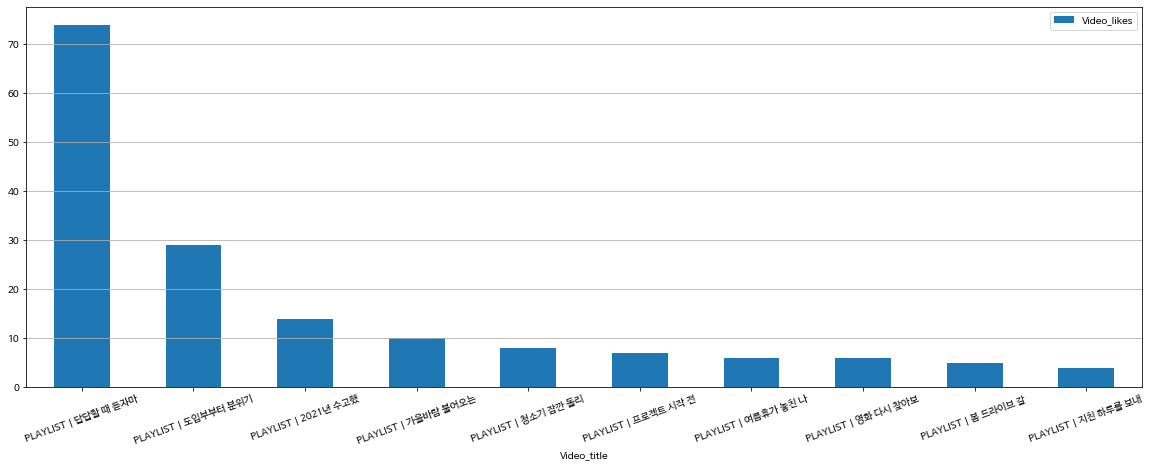

In [ ]:
df_copy.set_index('Video_title', inplace=True)
plt.rcParams["figure.figsize"] = (20, 7)
df_copy.plot.bar()
plt.grid(axis='y')
plt.xticks(rotation=20)